In [1]:
from google.colab import drive
drive.mount("/content/my_drive")

Mounted at /content/my_drive


In [2]:
%cd /content/my_drive/MyDrive/dataset_2

/content/my_drive/MyDrive/dataset_2


In [3]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_excel("ticaret-yorum.xlsx")

In [6]:
data.shape

(64000, 2)

In [7]:
data.head()

,category,text
0,alisveris,Altus Hırdavat Yapı Malzemeleri Drone Diye Kar...
1,alisveris,"Albay Bilgisayar Garanti Yalanı İle Yanılttı,G..."
2,alisveris,"Okyanus Petshop Ürün İade Sorunu!,Satıcıdan Gi..."
3,alisveris,Anda İhtiyaç Ve Tüketim Maddeleri Knee Tork Di...
4,alisveris,BB Kargo Dağıtım'dan Aldığım Ürün Bozuk Çıktı ...


In [9]:
print(data['text'][0])

Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,"Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"


In [10]:
data['category'].value_counts()

,count
category,
alisveris,2000
anne-bebek,2000
beyaz-esya,2000
bilgisayar,2000
cep-telefon-kategori,2000
egitim,2000
elektronik,2000
emlak-ve-insaat,2000
enerji,2000


#TF-IDF ile Textlerin Sayisallastirilmasi

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=7000,ngram_range=(1, 2))
X = vectorizer.fit_transform(data['text'])




In [17]:
X.shape

(64000, 10000)

In [19]:
type(X)

scipy.sparse._csr.csr_matrix

In [54]:
import torch
X=torch.tensor(X.toarray()).float()

In [23]:
gec=data['category'].value_counts()
list(gec.keys())

['alisveris',
 'anne-bebek',
 'beyaz-esya',
 'bilgisayar',
 'cep-telefon-kategori',
 'egitim',
 'elektronik',
 'emlak-ve-insaat',
 'enerji',
 'etkinlik-ve-organizasyon',
 'finans',
 'gida',
 'giyim',
 'hizmet-sektoru',
 'icecek',
 'internet',
 'kamu-hizmetleri',
 'kargo-nakliyat',
 'kisisel-bakim-ve-kozmetik',
 'kucuk-ev-aletleri',
 'medya',
 'mekan-ve-eglence',
 'mobilya-ev-tekstili',
 'mucevher-saat-gozluk',
 'mutfak-arac-gerec',
 'otomotiv',
 'saglik',
 'sigortacilik',
 'spor',
 'temizlik',
 'turizm',
 'ulasim']

In [24]:
y=data['category'].map({'alisveris':0,
 'anne-bebek':1,
 'beyaz-esya':2,
 'bilgisayar':3,
 'cep-telefon-kategori':4,
 'egitim':5,
 'elektronik':6,
 'emlak-ve-insaat':7,
 'enerji':8,
 'etkinlik-ve-organizasyon':9,
 'finans':10,
 'gida':11,
 'giyim':12,
 'hizmet-sektoru':13,
 'icecek':14,
 'internet':15,
 'kamu-hizmetleri':16,
 'kargo-nakliyat':17,
 'kisisel-bakim-ve-kozmetik':18,
 'kucuk-ev-aletleri':19,
 'medya':20,
 'mekan-ve-eglence':21,
 'mobilya-ev-tekstili':22,
 'mucevher-saat-gozluk':23,
 'mutfak-arac-gerec':24,
 'otomotiv':25,
 'saglik':26,
 'sigortacilik':27,
 'spor':28,
 'temizlik':29,
 'turizm':30,
 'ulasim':31

})

In [25]:
y=torch.tensor(y).long()

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_gec,y_train,y_gec=train_test_split(X,y,shuffle=True,test_size=0.5)

X_val,X_test,y_val,y_test=train_test_split(X_gec,y_gec,test_size=0.5)

In [27]:
import torch.optim as optim
import torch.nn as nn

In [69]:
class KategoriSiniflandir(nn.Module):
  def __init__(self):
    super().__init__()
    self.katman1=nn.Linear(7000,5000)
    self.relu=nn.ReLU()
    self.katman2=nn.Linear(5000,2000)
    self.katman3=nn.Linear(2000,32)
    self.kisa_yol=nn.Linear(7000,32)

  def forward(self,x):
    x1=self.katman1(x)
    x1=self.relu(x1)
    x1=self.katman2(x1)
    x1=self.relu(x1)
    x1=self.katman3(x1)
    return x1+self.kisa_yol(x)



In [70]:
torch.manual_seed(42)
model=KategoriSiniflandir()

In [30]:
device="cuda"

In [71]:
model.to(device)

KategoriSiniflandir(
  (katman1): Linear(in_features=7000, out_features=5000, bias=True)
  (relu): ReLU()
  (katman2): Linear(in_features=5000, out_features=2000, bias=True)
  (katman3): Linear(in_features=2000, out_features=32, bias=True)
  (kisa_yol): Linear(in_features=7000, out_features=32, bias=True)
)

In [32]:
t=0
for p in model.parameters():
  t+=p.numel()

print(t)

60071032


In [72]:
optimizer=optim.AdamW(model.parameters(),lr=3e-5)

In [34]:
kayip_fonk=nn.CrossEntropyLoss()

In [35]:
from tqdm import tqdm

In [73]:
egitim_kayiplar=[]
val_kayiplar=[]
for e in tqdm(range(50)):
  model.train()
  egitim_tahmin=model(X_train.to(device))
  egitim_kayip=kayip_fonk(egitim_tahmin,y_train.to(device))

  egitim_kayip.backward()
  optimizer.step()
  optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    val_tahmin=model(X_val.to(device))
    val_kayip=kayip_fonk(val_tahmin,y_val.to(device))

  egitim_kayiplar.append(egitim_kayip.item())
  val_kayiplar.append(val_kayip.item())


100%|██████████| 50/50 [00:51<00:00,  1.03s/it]


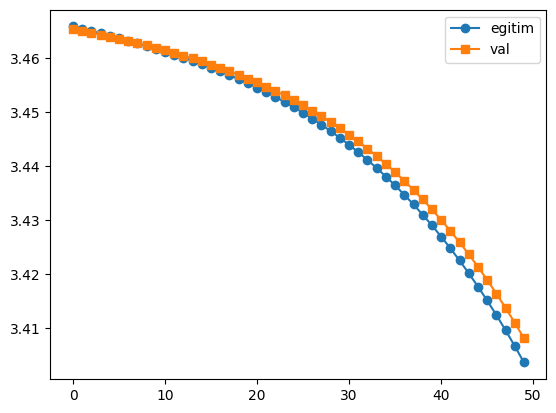

In [49]:
import matplotlib.pyplot as plt
plt.plot(torch.arange(50),egitim_kayiplar,label='egitim',marker='o')
plt.plot(torch.arange(50),val_kayiplar,label='val',marker='s')
plt.legend()
plt.show()

In [74]:
test_tahmin=model(X_test.to(device))

In [65]:
test_tahmin.shape

torch.Size([16000, 32])

In [75]:
sinif_tahmin=torch.argmax(test_tahmin,axis=1)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,sinif_tahmin.cpu())

0.5345625